In [5]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import csv

knn_CSVs = ["100k_KNNBasic_Results.csv", "100k_KNNWithMeans_Results.csv", 
            "100k_KNNWithZScore_Results.csv", "100k_KNNBaseline_Results.csv"]

df = pd.DataFrame()

for each_csv in knn_CSVs:
    temp_df = pd.read_csv(each_csv)
    sim_options_df = temp_df["sim_options"].apply(lambda x: pd.Series(re.split(" |,|:|}|\'", x)))
    temp_df.drop(temp_df.columns[[0, 5, 6, 7, 8]], axis=1, inplace=True)
    temp_df["similarity_metric"] = sim_options_df.iloc[0:, 5]
    temp_df["user-based?"] = sim_options_df.iloc[0:, 12]
    temp_df["algorithm"] = each_csv
    df = pd.concat([df, temp_df], ignore_index=True)

df.to_csv("100k_Results_Combined.csv")

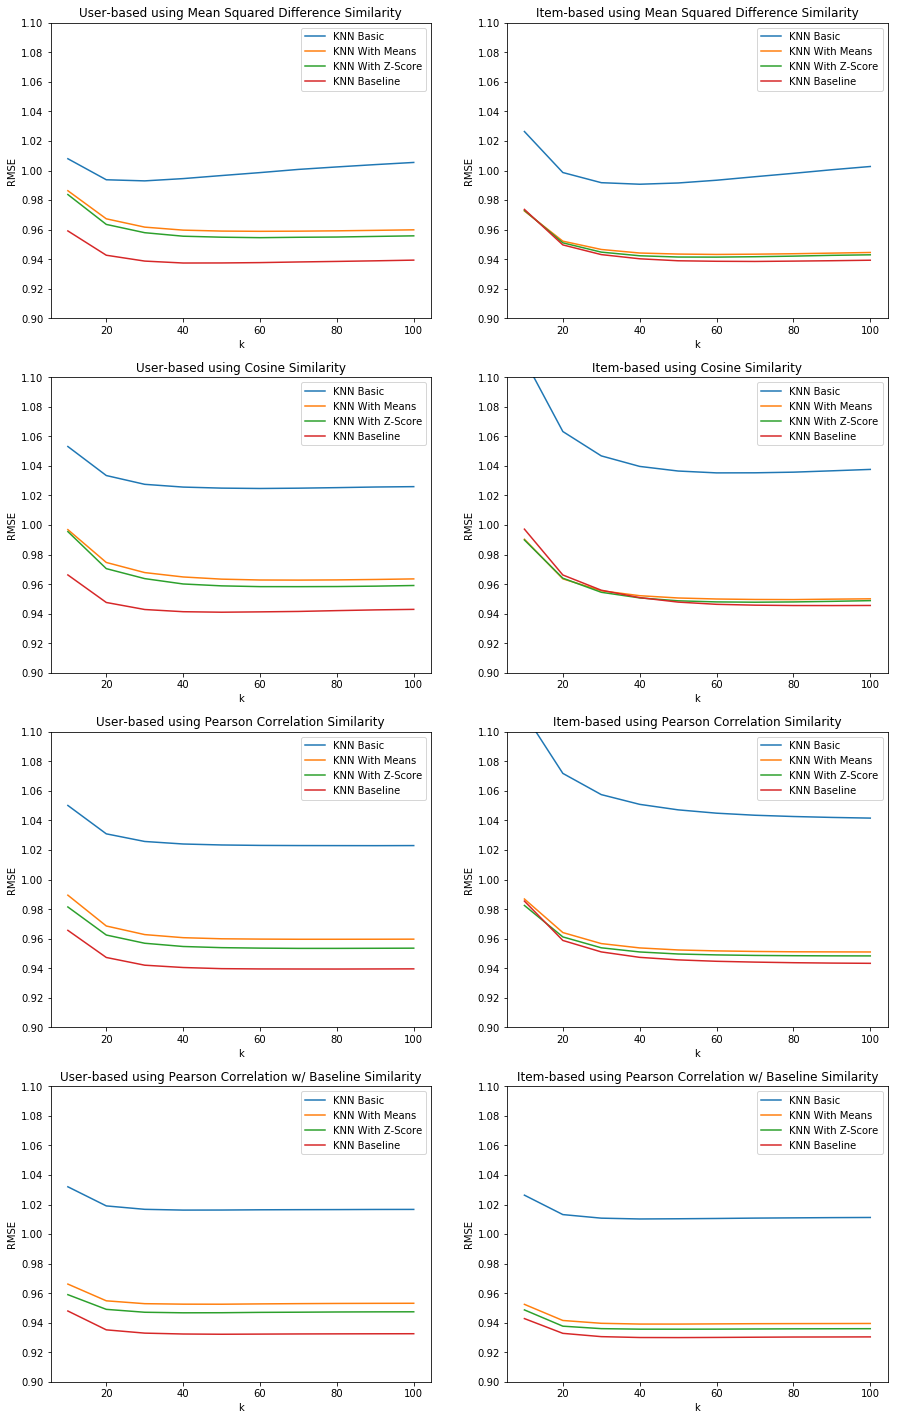

In [6]:
algorithm_dict = {"100k_KNNBasic_Results.csv": "KNN Basic", "100k_KNNWithMeans_Results.csv": "KNN With Means",
                  "100k_KNNWithZScore_Results.csv": "KNN With Z-Score", "100k_KNNBaseline_Results.csv": "KNN Baseline"}
metric_dict = {"msd": "Mean Squared Difference Similarity", "cosine": "Cosine Similarity", 
               "pearson": "Pearson Correlation Similarity", "pearson_baseline": "Pearson Correlation w/ Baseline Similarity"}
user_based_dict = {"True": "User-based", "False": "Item-based"}


def get_title(user_based, similarity_metric):
    return user_based_dict[user_based] + " using " + metric_dict[similarity_metric]

fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)
subplots = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

subplot_dict = {0: ["True", "msd"], 1: ["False", "msd"],
                2: ["True", "cosine"], 3: ["False", "cosine"],
                4: ["True", "pearson"], 5: ["False", "pearson"],
                6: ["True", "pearson_baseline"], 7: ["False", "pearson_baseline"]}

error_metric = "RMSE"
for i in range(len(subplots)):
    is_user_based, similarity_metric = subplot_dict[i]
    for algorithm in knn_CSVs:
        filtered_df = df[(df["user-based?"] == is_user_based) & (df["similarity_metric"] == similarity_metric) & (df["algorithm"] == algorithm)]
        subplots[i].plot(filtered_df["k"], filtered_df[error_metric], label=algorithm_dict[algorithm])
        subplots[i].set_xlabel("k")
        subplots[i].set_ylabel(error_metric)
        subplots[i].set_title(get_title(is_user_based, similarity_metric))
        subplots[i].legend(loc="upper right")
        subplots[i].set_ylim(bottom=.9, top=1.1)
        subplots[i].set_yticks((.9, .92, .94, .96, .98, 1, 1.02, 1.04, 1.06, 1.08, 1.1))
plt.show()


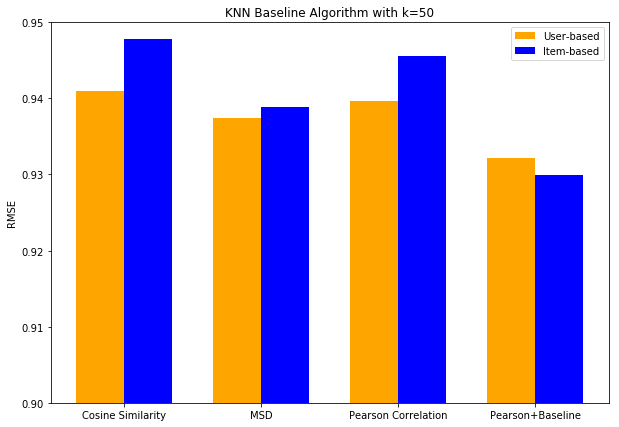

In [7]:
best_k = 50
filtered_df = df[(df["k"] == best_k) & (df["algorithm"] == "100k_KNNBaseline_Results.csv")]
best_user_based_errors = filtered_df[filtered_df["user-based?"] == "True"][error_metric]
best_item_based_errors = filtered_df[filtered_df["user-based?"] == "False"][error_metric]

num_of_sim_metric=4
bar_width = .35
ind = np.arange(num_of_sim_metric)

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
rects1 = ax.bar(ind, best_user_based_errors, bar_width, color="orange")
rects2 = ax.bar(ind+bar_width, best_item_based_errors, bar_width, color="blue")

ax.set_ylabel(error_metric)
ax.set_title("KNN Baseline Algorithm with k={}".format(best_k))
ax.set_xticks(ind + bar_width / 2)
ax.set_yticks((.9, .91, .92, .93, .94, .95))
ax.set_ylim(bottom=.9, top=.95)
ax.set_xticklabels(('Cosine Similarity', 'MSD', 'Pearson Correlation', 'Pearson+Baseline'))

ax.legend((rects1[0], rects2[0]), ('User-based', 'Item-based'))
plt.show()

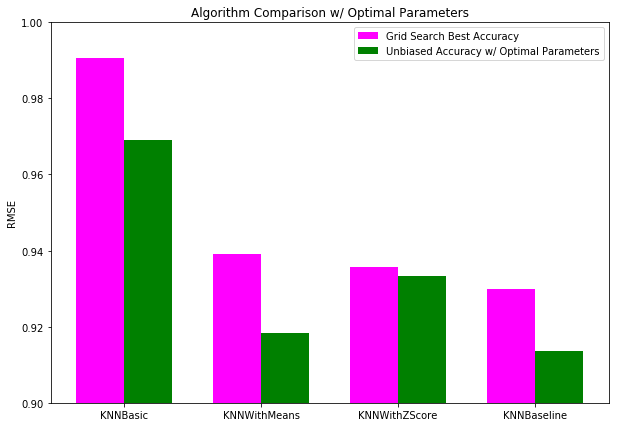

In [15]:
gridsearch_opt_accuracies = [0.990718028313, 0.939079136288, 0.935620684677, 0.929931954255]
unbiased_accuracies =[0.96899782698417969, 0.91831765436668245, 0.93329486881966095, 0.91349864307782735]

num_of_sim_metric=4
bar_width = .35
ind = np.arange(num_of_sim_metric)

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
rects1 = ax.bar(ind, gridsearch_opt_accuracies, bar_width, color="magenta")
rects2 = ax.bar(ind+bar_width, unbiased_accuracies, bar_width, color="green")

ax.set_ylabel(error_metric)
ax.set_title("Algorithm Comparison w/ Optimal Parameters")
ax.set_xticks(ind + bar_width / 2)
ax.set_yticks((.9, .92, .94, .96, .98, 1))
ax.set_ylim(bottom=.9, top=1)
ax.set_xticklabels(('KNNBasic', 'KNNWithMeans', 'KNNWithZScore', 'KNNBaseline'))

ax.legend((rects1[0], rects2[0]), ('Grid Search Best Accuracy', 'Unbiased Accuracy w/ Optimal Parameters'))
plt.show()